<a href="https://colab.research.google.com/github/jimkliew/simple_factors/blob/main/Quick_Factors_ETFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **"60/40"** -- The simplest way to gain exposure to stocks and bonds. Think of this as the average portfolio. ##
*  VTI: Vanguard **Total Stock Market** ETF
*  IVV: iShares Core **S&P 500** ETF
*  BND: Vanguard **Total Bond Market** ETF
*  AGG: iShares Core **U.S. Aggregate Bond** ETF



---

Given your benchmark of **"60/40"**, now consider adding **"long-only factor"** exposures.

Equity Long-only Factors(Value, Momentum, Quality, Small, Low Vol.):
*  VTV (Vanguard **Value** ETF)
*  VUG (Vanguard **Growth** ETF)
*  MTUM (iShares MSCI USA **Momentum** Factor ETF)
*  QUAL (iShares Edge MSCI USA **Quality** Factor ETF)
*  IWM (iShares Russell 2000 ETF) (**"Small"**)
*  USMV (iShares MSCI USA Minimum Volatility ETF) ("**low vol.**")

Fixed Income Long-only Factors (Credit, Term, Inflation):
*  HYG (iShares iBoxx **High Yield** Corporate Bond ETF)
*  LQD (iShares iBoxx $ **Investment Grade** Corporate Bond ETF)
*  BIL (SPDR Bloomberg Barclays 1-3 Month **T-Bill** ETF)
*  TLT (iShares 20+ Year **Treasury Bond** ETF)
*  TIP (iShares **TIPS** Bond ETF)

---
The next iteration would be to take your 60/40 average portfolio and overlay each of the "long/short" factors thereby overlaying a cheap version of "alpha" on your average portfolio.


In [22]:
!pip install yfinance pandas matplotlib

[*********************100%%**********************]  4 of 4 completed


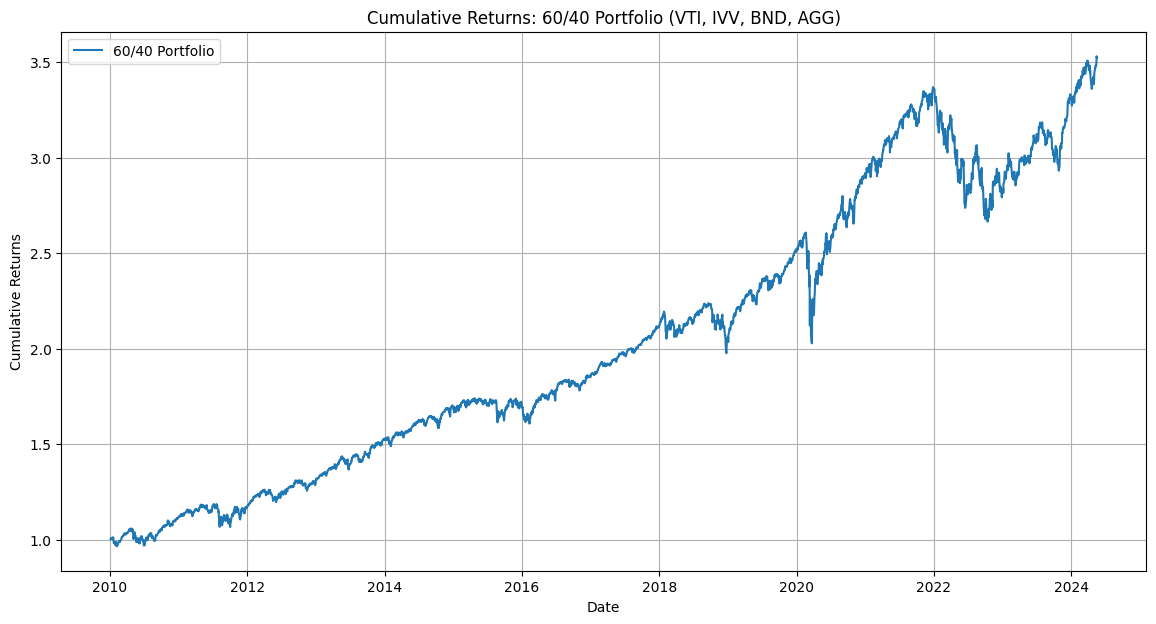

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers for the best and cheapest equity and bond ETFs
tickers = ['VTI', 'IVV', 'BND', 'AGG']

# Download historical data
data = yf.download(tickers, start='2010-01-01', end='2024-5-18')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Construct the 60/40 portfolio with the specified ETFs
weights_60_40 = {
    'VTI': 0.3, 'IVV': 0.3,
    'BND': 0.2, 'AGG': 0.2
}

# Calculate the 60/40 portfolio returns
portfolio_60_40 = (returns * pd.Series(weights_60_40)).sum(axis=1)

# Calculate cumulative returns for the 60/40 portfolio
cumulative_returns_60_40 = (1 + portfolio_60_40).cumprod()

# Plot cumulative returns for the 60/40 portfolio
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_60_40, label='60/40 Portfolio')
plt.title('Cumulative Returns: 60/40 Portfolio (VTI, IVV, BND, AGG)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



[*********************100%%**********************]  14 of 14 completed


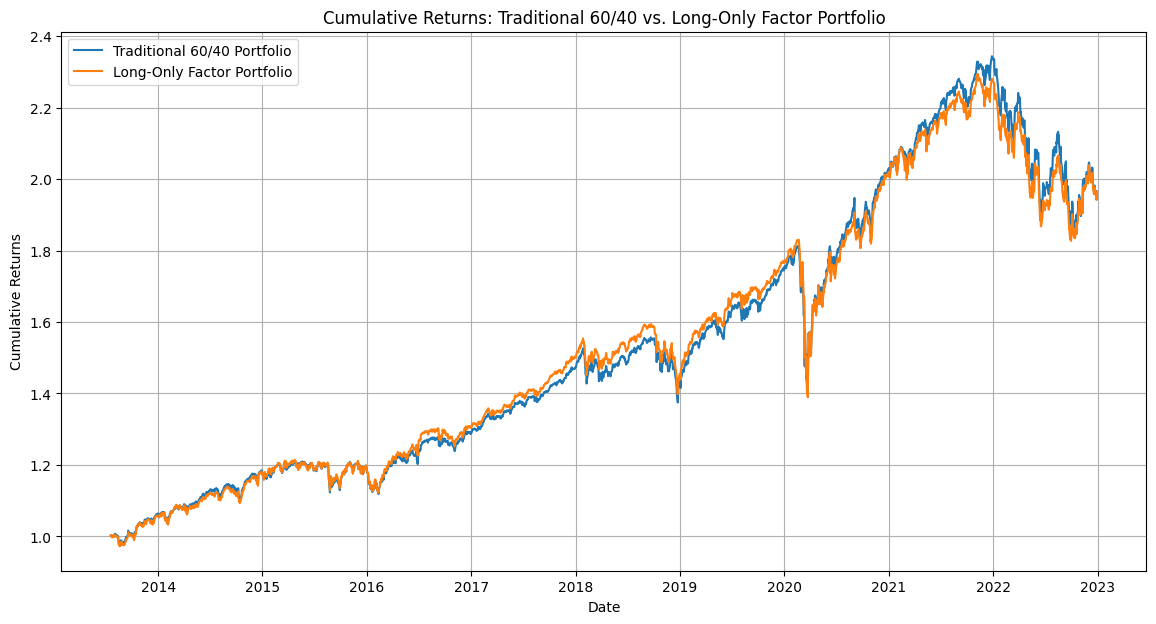

In [24]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers for the equity and bond factors
equity_factors = ['VTV', 'MTUM', 'QUAL', 'IWM', 'USMV']
bond_factors = ['HYG', 'LQD', 'BIL', 'TLT', 'TIP']

# Combine all tickers
all_tickers = equity_factors + bond_factors

# Download historical data
data = yf.download(all_tickers + ['VTI', 'IVV', 'BND', 'AGG'], start='2010-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Construct the 60/40 traditional portfolio
weights_60_40 = {
    'VTI': 0.3, 'IVV': 0.3,
    'BND': 0.2, 'AGG': 0.2
}
portfolio_60_40 = (returns[['VTI', 'IVV', 'BND', 'AGG']] * pd.Series(weights_60_40)).sum(axis=1)
cumulative_returns_60_40 = (1 + portfolio_60_40).cumprod()

# Construct the long-only factor portfolio
weights_factors = {
    'VTV': 0.12, 'MTUM': 0.12, 'QUAL': 0.12, 'IWM': 0.12, 'USMV': 0.12,  # 60% allocation in total
    'HYG': 0.08, 'LQD': 0.08, 'BIL': 0.08, 'TLT': 0.08, 'TIP': 0.08  # 40% allocation in total
}
portfolio_factors = (returns[equity_factors + bond_factors] * pd.Series(weights_factors)).sum(axis=1)
cumulative_returns_factors = (1 + portfolio_factors).cumprod()

# Plot cumulative returns for both portfolios
plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns_60_40, label='Traditional 60/40 Portfolio')
plt.plot(cumulative_returns_factors, label='Long-Only Factor Portfolio')
plt.title('Cumulative Returns: Traditional 60/40 vs. Long-Only Factor Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


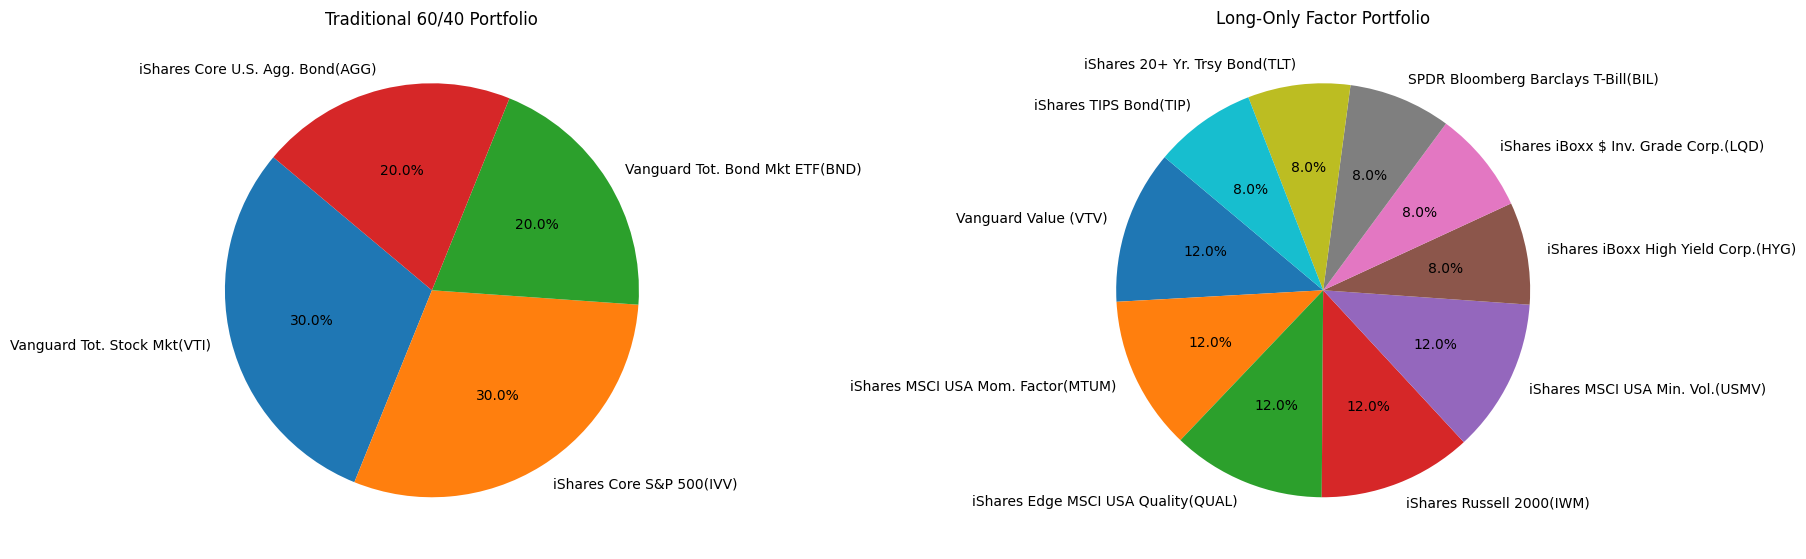

In [21]:
import matplotlib.pyplot as plt

# Define the full ETF names for the traditional 60/40 portfolio
traditional_names = [
    'Vanguard Tot. Stock Mkt(VTI)',
    'iShares Core S&P 500(IVV)',
    'Vanguard Tot. Bond Mkt ETF(BND)',
    'iShares Core U.S. Agg. Bond(AGG)'
]

traditional_weights = [0.3, 0.3, 0.2, 0.2]

# Define the full ETF names for the long-only factor portfolio
factor_names = [
    'Vanguard Value (VTV)',
    'iShares MSCI USA Mom. Factor(MTUM)',
    'iShares Edge MSCI USA Quality(QUAL)',
    'iShares Russell 2000(IWM)',
    'iShares MSCI USA Min. Vol.(USMV)',
    'iShares iBoxx High Yield Corp.(HYG)',
    'iShares iBoxx $ Inv. Grade Corp.(LQD)',
    'SPDR Bloomberg Barclays T-Bill(BIL)',
    'iShares 20+ Yr. Trsy Bond(TLT)',
    'iShares TIPS Bond(TIP)'
]

factor_weights = [0.12, 0.12, 0.12, 0.12, 0.12, 0.08, 0.08, 0.08, 0.08, 0.08]

# Plot the traditional 60/40 portfolio allocations
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
plt.pie(traditional_weights, labels=traditional_names, autopct='%2.1f%%', startangle=140)
plt.title('Traditional 60/40 Portfolio')

# Plot the long-only factor portfolio allocations
plt.subplot(1, 2, 2)
plt.pie(factor_weights, labels=factor_names, autopct='%2.1f%%', startangle=140)
plt.title('Long-Only Factor Portfolio')

plt.tight_layout()
plt.show()
